In [84]:
from sklearn.datasets import make_blobs
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [85]:
x,y=make_blobs(  
    n_samples=100,  
    n_features=2
)  

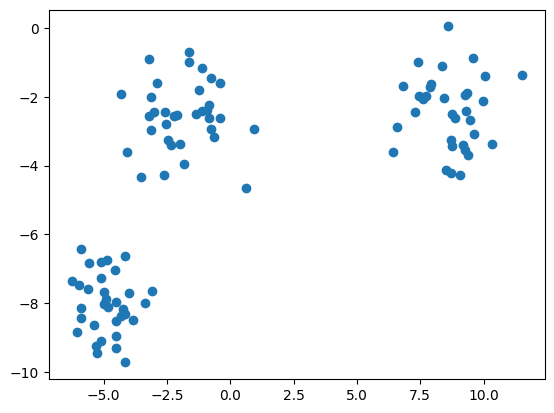

In [86]:
plt.scatter(x[:,0],x[:,1])

In [87]:
x=np.random.rand(600,2)
y=np.random.rand(600,2)

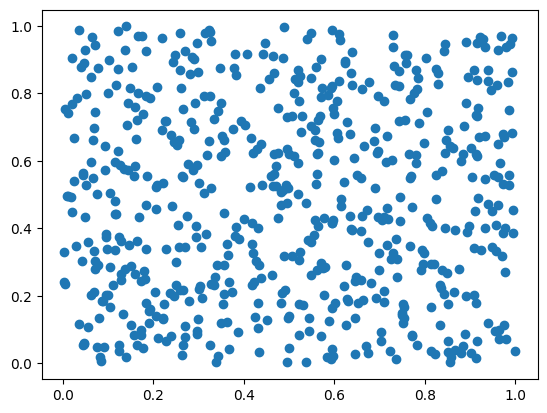

In [88]:
plt.scatter(x[:,0],x[:,1])

In [89]:
from sklearn.cluster import KMeans

In [90]:
wcss=list()
for No_of_centroids in range(1,11):
    model=KMeans(n_clusters=No_of_centroids,init="k-means++")
    model.fit(x)
    wcss.append(model.inertia_)



In [91]:
wcss

[100.29049022946731,
 62.110803426822805,
 39.58268573840418,
 24.615633162752495,
 20.682726532010484,
 17.39230232922186,
 14.97716582406058,
 12.80541781691225,
 11.7695620999216,
 9.951901589427846]

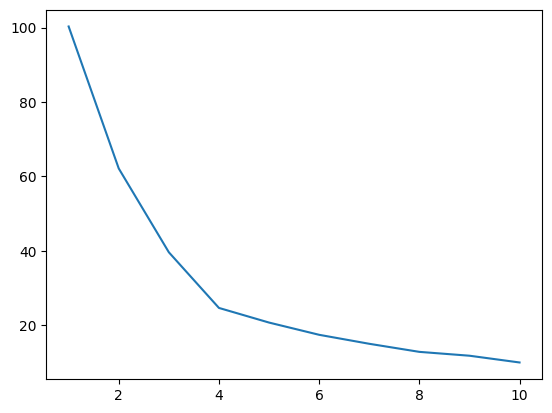

In [92]:
plt.plot(range(1,11),wcss)

In [93]:
from kneed import KneeLocator

In [94]:
k=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [95]:
k.elbow

4

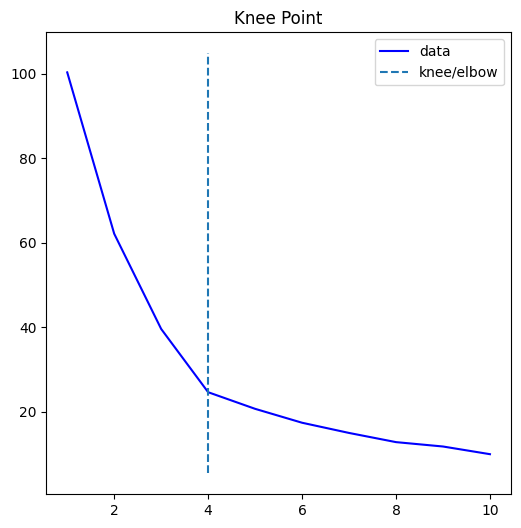

In [96]:
k.plot_knee()

In [97]:
model=KMeans(n_clusters=4,init="k-means++")
model.fit(x)

KMeans(n_clusters=4)

In [98]:
preds=model.labels_

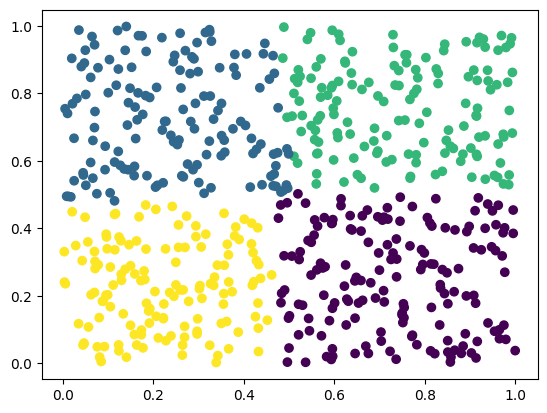

In [99]:
plt.scatter(x[:,0],x[:,1],c=preds)

In [100]:
from sklearn.metrics import silhouette_score

In [101]:
silhoute_score=list()
for k in range(2,12):
    model=KMeans(n_clusters=k,init="k-means++")
    model.fit(x)
    score=silhouette_score(x,labels=model.labels_)
    silhoute_score.append(score)

In [102]:
silhoute_score

[0.3541186631401195,
 0.3869997457159201,
 0.4164756845091777,
 0.3998336565678101,
 0.3697948448687554,
 0.36096691143577675,
 0.3677034913776872,
 0.36888506260710585,
 0.36245150166361345,
 0.3605298695049393]

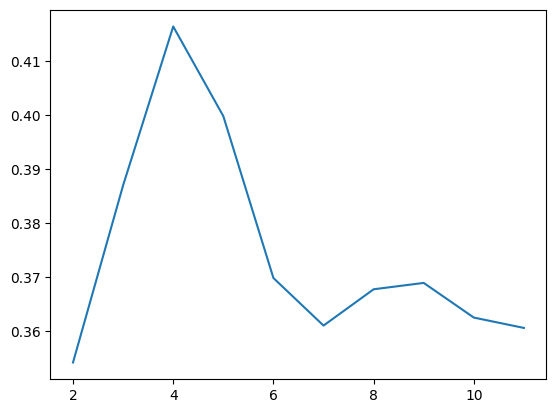

In [103]:
plt.plot(range(2,12),silhoute_score)

In [104]:
y_pred=model.predict(y)

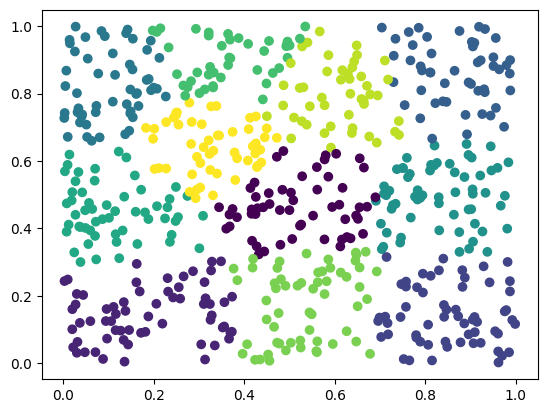

In [105]:
plt.scatter(y[:,0],y[:,1],c=y_pred)

# Hierarchical Clustering

In [106]:
import seaborn as sns

In [107]:
df=sns.load_dataset("iris")

In [108]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [109]:
df["species"]=df["species"].apply(lambda x:1 if x=="setosa" else (2 if x=="virginica" else 0))

In [110]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [111]:
from sklearn.decomposition import PCA

In [112]:
pca_model=PCA(n_components=2)

In [113]:
pca_scaled_model=pca_model.fit_transform(df.iloc[:,:-1])

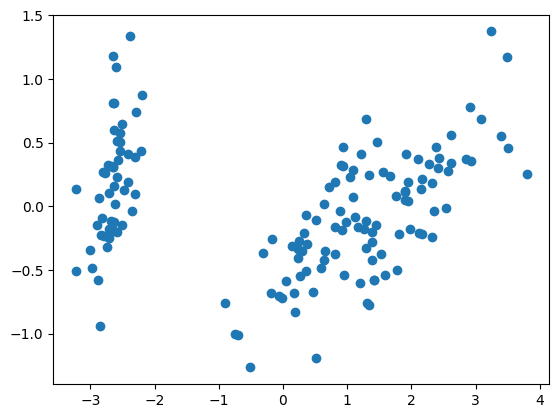

In [114]:
plt.scatter(pca_scaled_model[:,0],pca_scaled_model[:,1])

In [115]:
import scipy.cluster.hierarchy  as sc

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [85.0, 85.0, 110.0, 110.0],
  [51.25, 51.25, 97.5, 97.5],
  [12.5, 12.5, 74.375, 74.375],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [43.4375, 43.4375, 144.375, 144.375],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [192.5, 192.5, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [270.0, 270.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [330.0, 330.0, 350.0, 350.0],
  [285.0, 285.0, 340

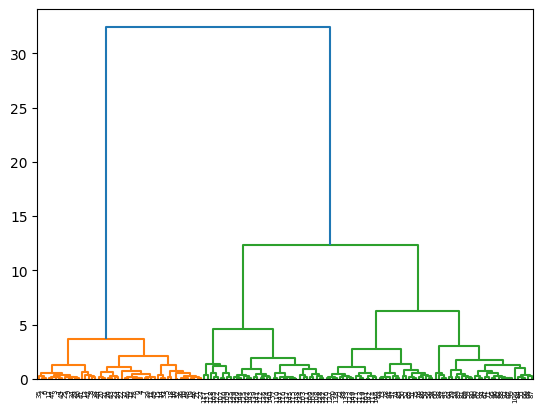

In [116]:
sc.dendrogram(sc.linkage(pca_scaled_model,metric='euclidean',method="ward"))

In [117]:
from sklearn.cluster import AgglomerativeClustering

In [118]:
model=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage='ward')
model.fit(pca_scaled_model)

AgglomerativeClustering()

In [119]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

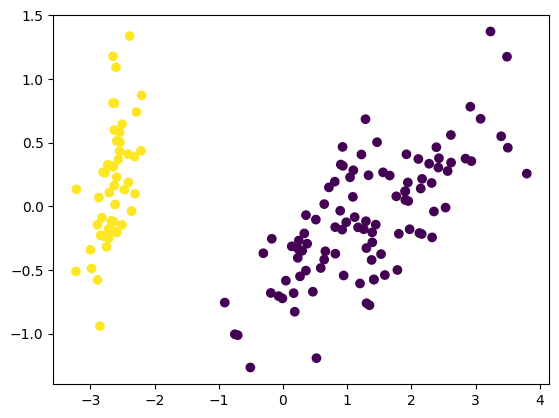

In [120]:
plt.scatter(pca_scaled_model[:,0],pca_scaled_model[:,1],c=model.labels_)

In [121]:
silhoutee_score=list()
for i in range(2,12):
    model=AgglomerativeClustering(n_clusters=i,metric="euclidean",linkage='ward')
    model.fit(pca_scaled_model)
    score=silhouette_score(pca_scaled_model,model.labels_)
    silhoutee_score.append(score)


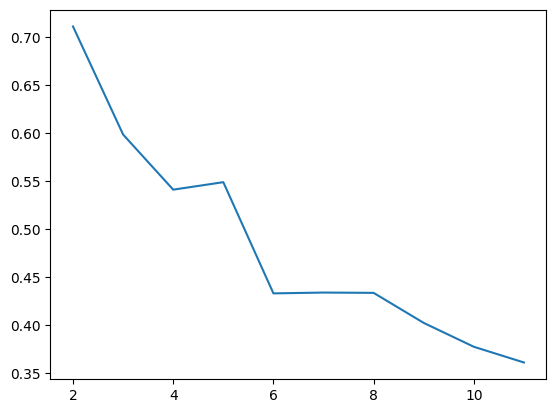

In [122]:
plt.plot(range(2,12),silhoutee_score)

# DB Scan

In [123]:
from sklearn.datasets import make_moons

In [124]:
x,y=make_moons(n_samples=100,random_state=5)

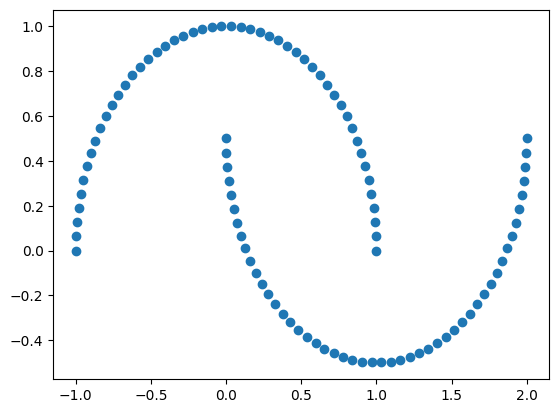

In [125]:
plt.scatter(x[:,0],x[:,1])

In [126]:
from sklearn.cluster import DBSCAN

In [127]:
model=DBSCAN(eps=0.5)

In [128]:
model.fit(x)

DBSCAN()

In [129]:
model.labels_

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

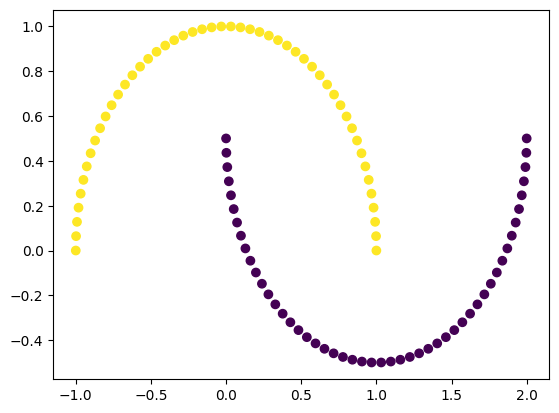

In [130]:
plt.scatter(x[:,0],x[:,1],c=model.labels_)